In [151]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msno
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

In [2]:
path = os.path.abspath(os.path.join('data\\WA_Fn-UseC_-Telco-Customer-Churn.csv'))
data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing values handling

In [38]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title='Churn analysis')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 29.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
profile.to_file("churn_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


<Axes: >

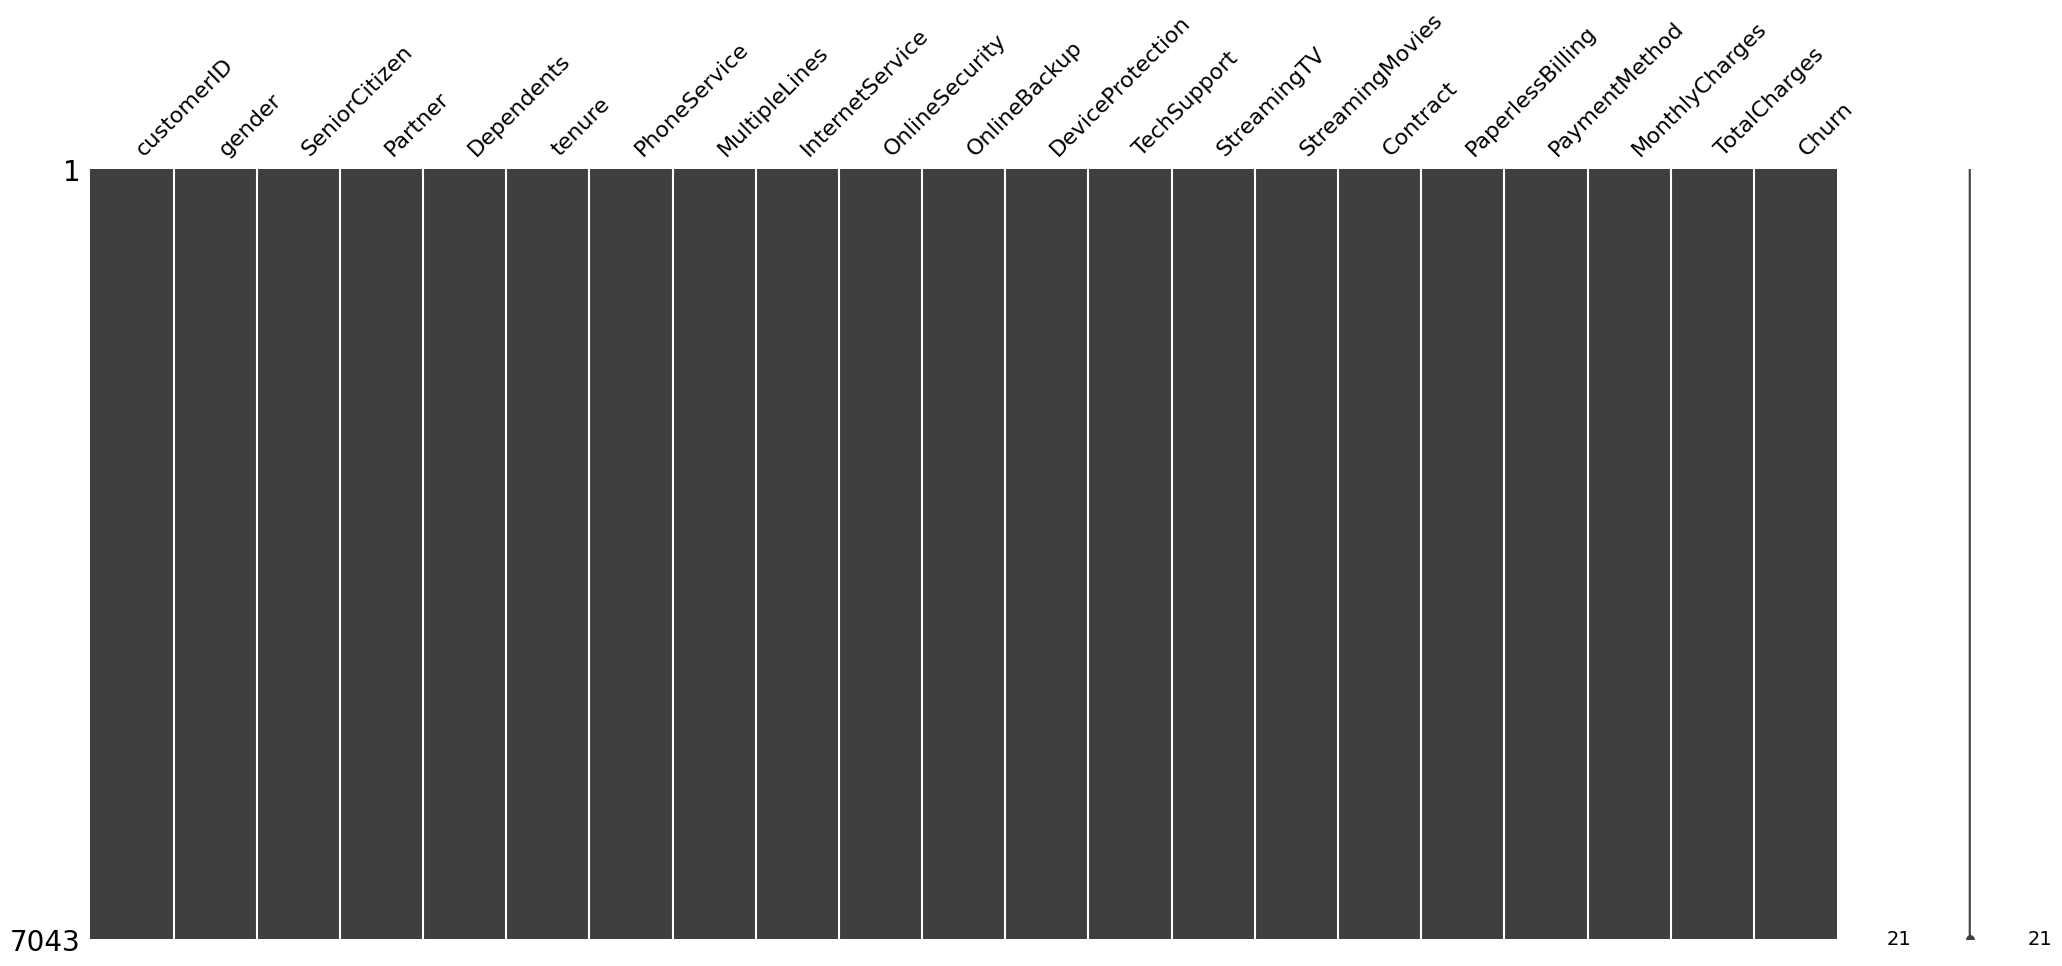

In [6]:
msno.matrix(data)

In [7]:
data.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [8]:
# check duplicated rows
data[data.duplicated()] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0)
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Data type handling

In [10]:
#change totalcharges to numeric
data['TotalCharges'] = data['TotalCharges'].astype('float64')

#change SeniorCitizen to object
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"})


#remove invalid fields
data.drop('customerID', axis=1, inplace=True)

#drop NULL total charges
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [11]:
#train test split
X_train, X_test,y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3)
print(X_train.shape)
print(y_train.shape)

(4922, 19)
(4922,)


### Numerical analysis

In [12]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4922.0,32.597521,24.430101,1.00,9.0000,30.000,55.00,72.00
MonthlyCharges,4922.0,64.984082,29.974657,18.25,36.0000,70.400,89.95,118.75
TotalCharges,4922.0,2298.283492,2260.299812,18.80,418.2625,1406.775,3848.60,8672.45


In [13]:
numeric_df = X_train.select_dtypes(exclude='object')
numeric_df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

<Axes: xlabel='TotalCharges', ylabel='Count'>

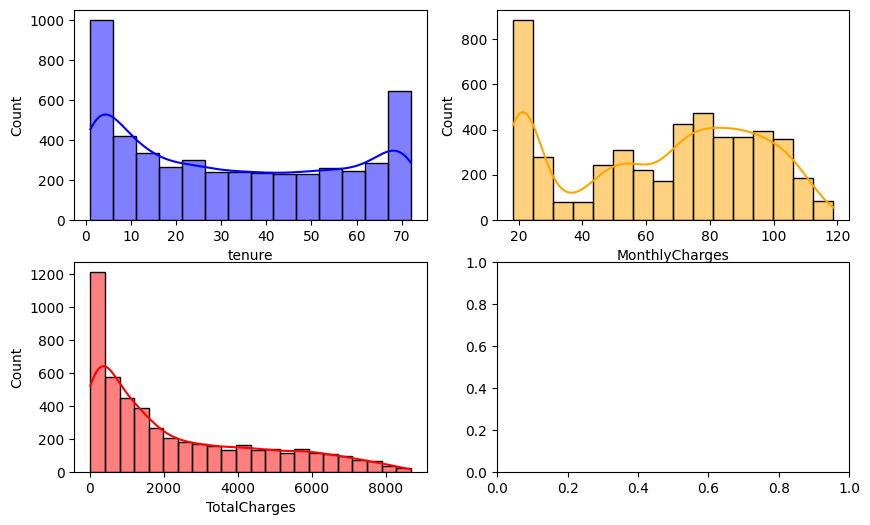

In [14]:
#univariate distribution
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(data=numeric_df, x="tenure", kde=True, ax=ax[0,0], color='blue')
sns.histplot(data=numeric_df, x="MonthlyCharges", kde=True, ax=ax[0,1], color='orange')
sns.histplot(data=numeric_df, x="TotalCharges", kde=True, ax=ax[1,0], color='red')


<Axes: ylabel='TotalCharges'>

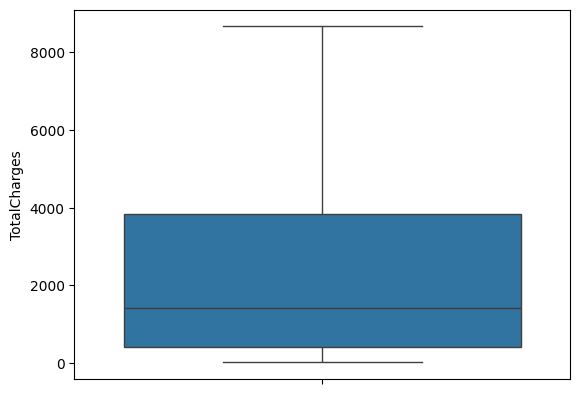

In [15]:
sns.boxplot(numeric_df['TotalCharges'])

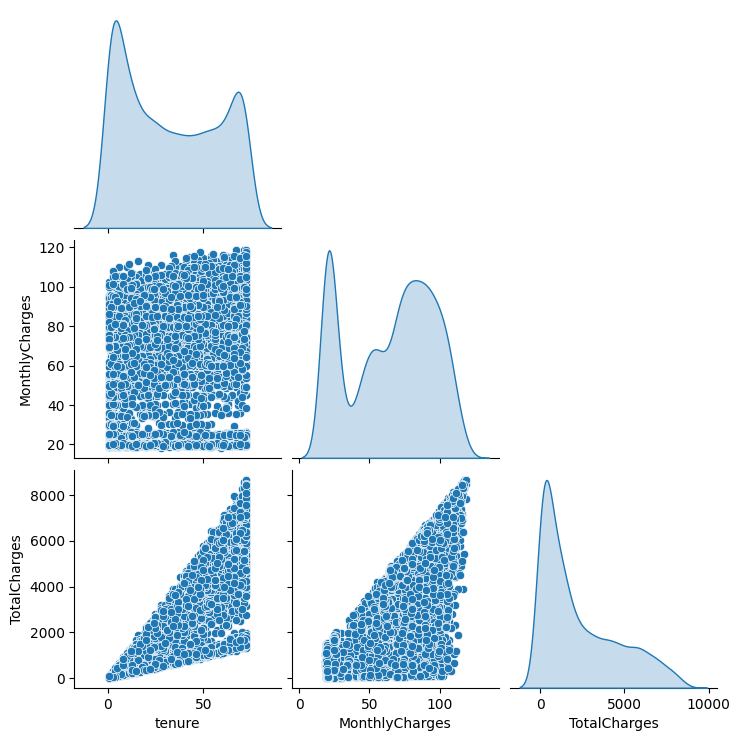

In [16]:
# multivariate relationship
sns.pairplot(numeric_df, kind='scatter', diag_kind='kde', corner=True)

<Axes: >

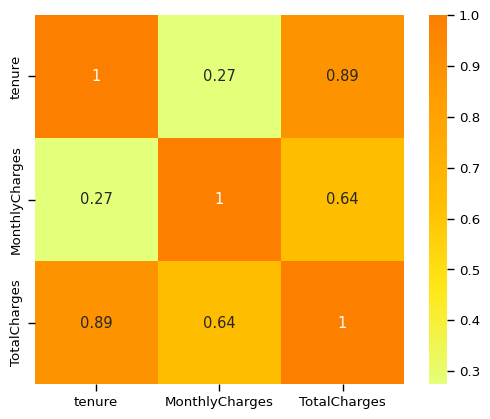

In [74]:
#from scipy.stats import spearmanr
correlation = numeric_df.corr(method='spearman')
sns.heatmap(correlation, cmap = 'Wistia', annot=True, square=True)

Text(0.5, 1.0, 'Distribution of total charges by churn')

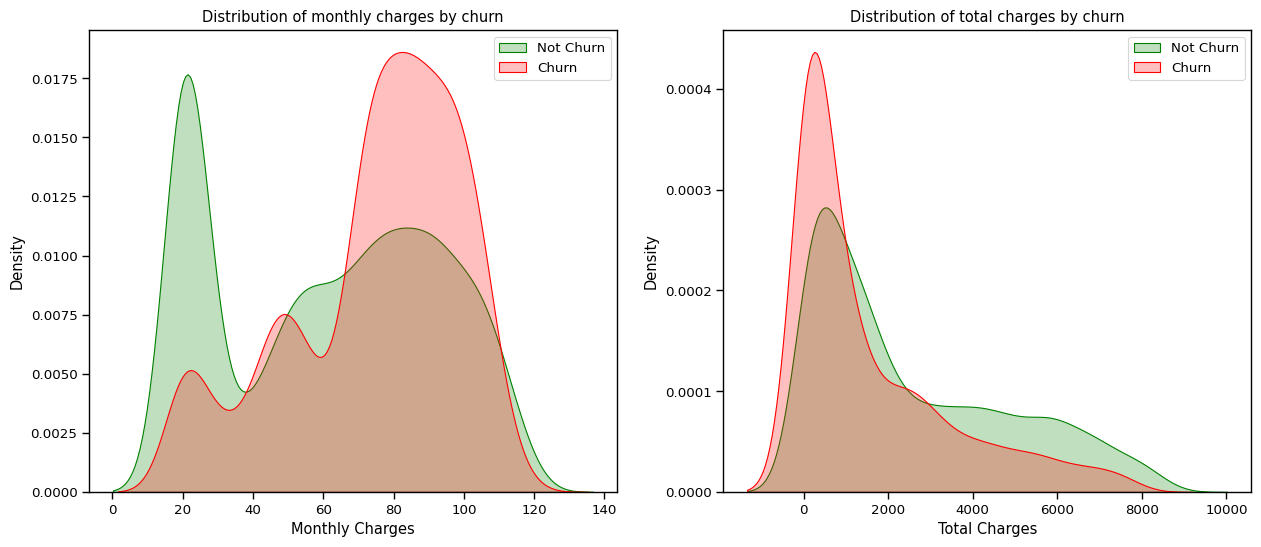

In [30]:
#num vs target (cat) 
sns.set_context("paper",font_scale=1.1)

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.kdeplot(X_train.MonthlyCharges[y_train == 'No' ], ax = ax[0], color="Green", fill = True)
sns.kdeplot(X_train.MonthlyCharges[y_train == 'Yes' ], ax =ax[0], color="Red", fill= True)
ax[0].legend(["Not Churn","Churn"],loc='upper right')
ax[0].set_ylabel('Density')
ax[0].set_xlabel('Monthly Charges')
ax[0].set_title('Distribution of monthly charges by churn')



sns.kdeplot(X_train.TotalCharges[y_train == 'No' ], ax = ax[1], color="Green", fill = True);
sns.kdeplot(X_train.TotalCharges[y_train == 'Yes'], ax =ax[1], color="Red", fill= True);
ax[1].legend(["Not Churn","Churn"], loc='upper right')
ax[1].set_ylabel('Density')
ax[1].set_xlabel('Total Charges')
ax[1].set_title('Distribution of total charges by churn')

In [ ]:
#outliers
#num vs cat


## Categorical analysis

In [121]:
cat_df = X_train.loc[:, ~X_train.columns.isin(numeric_df.columns)]
cat_cols = cat_df.columns
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

<Axes: xlabel='count', ylabel='OnlineSecurity'>

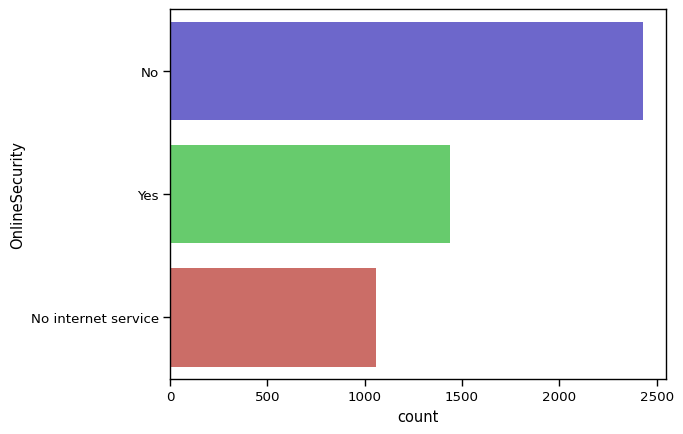

In [76]:
#categorical univariate
sns.countplot(y=cat_df['OnlineSecurity'], order=cat_df['OnlineSecurity'].value_counts().index, hue=cat_df['OnlineSecurity'], palette='hls')

In [123]:
#cat vs cat relationship analysis - chi squared
from itertools import product
from scipy.stats import chi2_contingency

cat_var_prod = list(product(cat_cols,cat_cols, repeat = 1))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(chi2_contingency(pd.crosstab(cat_df[i[0]], cat_df[i[1]])))[1]))

chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'p-val'])
chi_test_output.pivot(index='var1', columns='var2', values='p-val')

var2,Contract,Dependents,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,gender
var1,,,,,,,,,,,,,,,,
Contract,NaN,3.423572e-71,4.320966e-189,3.690506e-98,6.913669e-10,1.808572e-144,1.556334e-205,4.741737e-34,1.164948e-103,2.106033e-148,9.735185e-01,1.652416e-27,1.073154e-123,2.283031e-121,1.063002e-231,0.653313
Dependents,3.423572e-71,NaN,9.131232e-34,1.486106e-41,1.001524e-01,1.204114e-34,1.028459e-45,5.179444e-19,1.200351e-217,1.084293e-27,4.040539e-01,9.408687e-50,3.441548e-27,1.061977e-28,2.890812e-42,0.127114
DeviceProtection,4.320966e-189,9.131232e-34,NaN,0.000000e+00,3.459743e-119,0.000000e+00,0.000000e+00,1.369605e-115,1.278768e-27,1.468843e-166,2.730976e-32,1.647066e-37,0.000000e+00,0.000000e+00,0.000000e+00,0.830242
InternetService,3.690506e-98,1.486106e-41,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,7.439778e-162,8.088915e-01,4.466083e-206,2.740402e-223,1.657463e-75,0.000000e+00,0.000000e+00,0.000000e+00,0.837414
MultipleLines,6.913669e-10,1.001524e-01,3.459743e-119,0.000000e+00,NaN,3.647777e-117,1.937364e-103,1.429635e-38,1.195139e-22,3.725665e-52,0.000000e+00,2.088139e-21,6.092713e-136,2.349612e-134,8.807634e-104,0.634888
OnlineBackup,1.808572e-144,1.204114e-34,0.000000e+00,0.000000e+00,3.647777e-117,NaN,0.000000e+00,1.304939e-115,2.905248e-28,2.268915e-162,1.105095e-32,8.124845e-38,0.000000e+00,0.000000e+00,0.000000e+00,0.357951
OnlineSecurity,1.556334e-205,1.028459e-45,0.000000e+00,0.000000e+00,1.937364e-103,0.000000e+00,NaN,4.706464e-131,7.168628e-28,1.766371e-196,9.359117e-34,6.562223e-49,0.000000e+00,0.000000e+00,0.000000e+00,0.527292
PaperlessBilling,4.741737e-34,5.179444e-19,1.369605e-115,7.439778e-162,1.429635e-38,1.304939e-115,4.706464e-131,NaN,1.434869e-01,5.366065e-68,6.151661e-01,7.980118e-26,4.063477e-124,7.069862e-127,2.949497e-124,0.031906
Partner,1.164948e-103,1.200351e-217,1.278768e-27,8.088915e-01,1.195139e-22,2.905248e-28,7.168628e-28,1.434869e-01,NaN,5.311161e-29,3.795735e-02,3.872272e-01,1.061103e-19,4.310227e-19,2.133160e-20,0.652386


<Axes: xlabel='var2', ylabel='var1'>

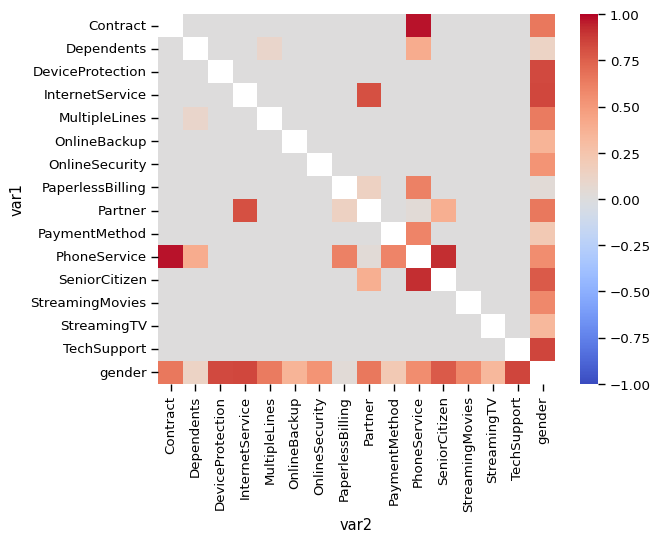

In [132]:
chi_test_matrix = chi_test_output.pivot(index='var1', columns='var2', values='p-val')
sns.heatmap(chi_test_matrix, cmap='coolwarm', vmin=-1, vmax=1)

## Target variable analysis

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_9016\826451131.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='percent', ylabel='Churn'>

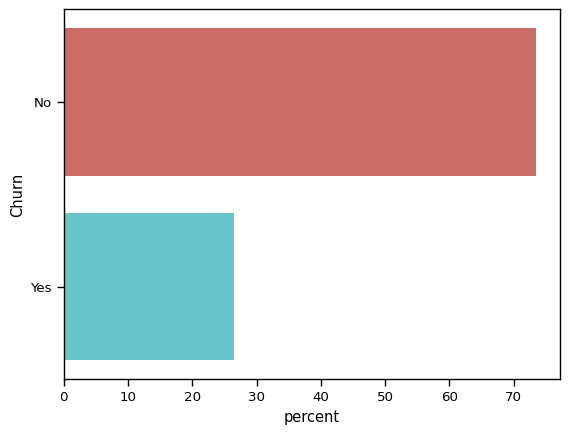

In [104]:
sns.countplot(y_train, palette='hls', stat='percent')

In [117]:
no_churn = np.round(y_train[y_train == 'No'].shape[0] / y_train.shape[0] * 100, 2)
yes_churn = np.round(y_train[y_train == 'Yes'].shape[0] / y_train.shape[0] * 100, 2)
print(f'Not churned: {no_churn}%, Churned: {yes_churn}%')

Not churned: 73.45%, Churned: 26.55%


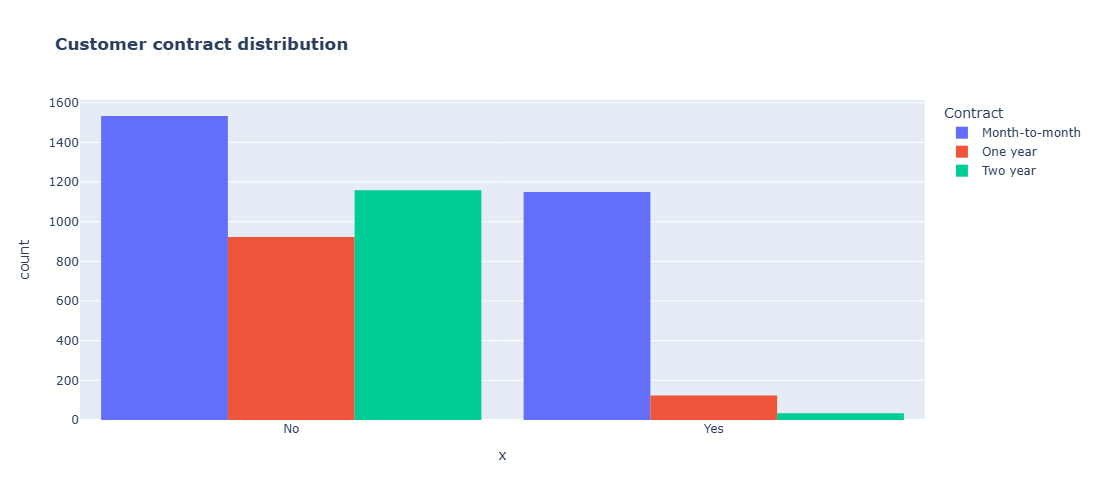

In [118]:
fig = px.histogram(cat_df, x=y_train, color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<Axes: xlabel='Churn', ylabel='count'>

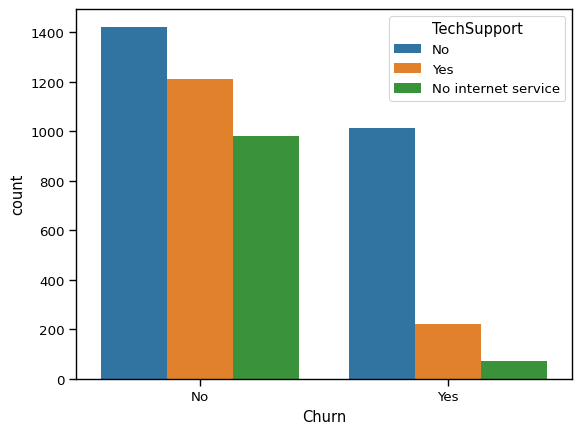

In [119]:
sns.countplot(cat_df, x=y_train, hue=cat_df['TechSupport'], hue_order=cat_df['TechSupport'].value_counts().index)

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_9016\3881648478.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




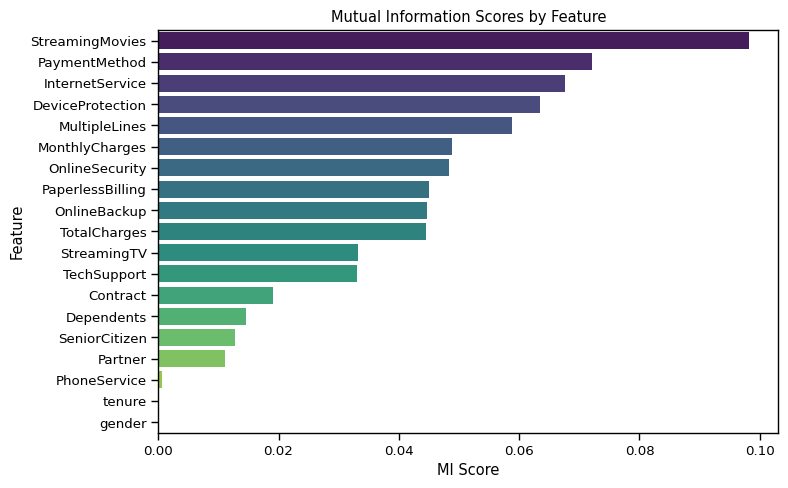

In [146]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
from numpy import hstack

y_train_nunmeric = y_train.map({'No': 0, 'Yes': 1 })
X_num = X_train[numeric_df.columns].to_numpy()
X_cat = OrdinalEncoder().fit_transform(cat_df)
X_all = np.hstack((X_cat, X_num))
discrete_mask = [True] * X_cat.shape[1] + [False] * X_num.shape[1]

mi_scores = mutual_info_classif(X_all, y_train_nunmeric, discrete_features=discrete_mask)
mi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='viridis')
plt.title('Mutual Information Scores by Feature')
plt.tight_layout()
plt.show()

In [152]:
def object_to_int(df, encode=True):
    if df.dtype=='object' and encode:
        df = LabelEncoder().fit_transform(df)
    return df

X_encode = X_train.apply(lambda x: object_to_int(x))
X_encode.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1642,0,0,1,0,29,1,0,2,1,1,1,1,1,1,0,0,3,19.85,573.05
2248,1,0,1,1,30,1,2,0,2,0,0,0,0,0,0,1,0,54.45,1588.70
5639,1,0,0,0,6,1,0,2,1,1,1,1,1,1,0,0,3,20.65,109.30
1595,1,1,0,0,2,1,0,1,0,2,0,0,0,0,0,1,2,74.70,165.40
2963,0,0,1,1,34,1,2,2,1,1,1,1,1,1,1,1,1,25.60,917.15


In [161]:
X_train.loc[:, X_train.apply(lambda x: x.nunique() == 2)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
1642,Female,No,Yes,No,Yes,No
2248,Male,No,Yes,Yes,Yes,Yes
5639,Male,No,No,No,Yes,No
1595,Male,Yes,No,No,Yes,Yes
2963,Female,No,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...
4364,Female,No,No,No,Yes,Yes
2250,Female,No,No,No,Yes,No
7022,Male,No,No,No,Yes,Yes
5876,Female,Yes,No,No,Yes,Yes
